<h1> Simulación. S20 - Módulo 4. Actividad didáctica 2 </h1>
<h2>  proyecto integrador del curso de simulación - Ultima entrega</h2>
<h3> Proyecto Integrado </h3>
<li> Edwin Alexander Ibarra Ortiz - PREICA2401B020089</li>
<li> Sergio Andres Rios Gomez - PREICA2401B020089</li>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

In [2]:
# Cargar datos de Tiempo entre llegadas de clientes
data = pd.read_csv('Resultados.csv')
df = data.sort_values(by='Orden de atencion')
df = df.drop(columns=['Hora Inicio Buffer'])
df['Tiempo_atencion (seg)'] = ((df['Hora Finalización Servicio'] - df['Hora Inicio Servicio'])/100)
df.head()

,ID,TIPO,TELL,HLL,BONIFICACION,TE,TE + Bonificacion,Hora Inicio Servicio,Hora Finalización Servicio,Orden de atencion,Numero de servidores,Tiempo_atencion (seg)
0,1,Bancario,7.774484,7.774484,400,0.0,0.0,0,600,0,5,6.0
54,5,VIP,35.518544,114.151776,1800,0.0,0.0,0,400,0,6,4.0
53,4,Usuarios,37.544646,78.633231,0,0.0,0.0,0,500,0,6,5.0
52,3,Personal,10.851132,41.088585,1000,0.0,0.0,0,300,0,6,3.0
51,2,Bancario,10.668441,30.237453,400,0.0,0.0,0,400,0,6,4.0


<h2> EDA </h2>
<h4> 1. Análisis de Tipos de Datos </h4>

<li>ID: Identificación del número del cliente.    </li>
<li>TIPO: Tipo de cliente en el sistema.   </li>
<li>TELL: Tiempo de llegada del cliente  </li>
<li>HLL: Acumulado TELL</li>
<li>BONIFICACION: Score asignado por tipo de cliente.</li>
<li>TE: Tiempo de espera antes de ser atendido. </li>
<li>TE + Bonificacion: Score que determina la prioridad con la que un cliente pasa al bufer, entre mayor sea el valor mayor es la prioridad.  </li> 
<li>Hora Inicio Servicio: Hora en la cual inicia el servicio   </li>
<li>Hora Finalización Servicio: Hora en la cual finaliza el servcio  </li>
<li>Orden de atencion: Núero u orden en el cual el cliente es atendido.</li>
<li>Numero de servidores: Cantidad de cajeros atendiendo al mismo tiempo. </li>
<li>Tiempo_atencion (seg): Tiempo en el cual el cliente esta en atención en caja. </li>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 26
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          300 non-null    int64  
 1   TIPO                        300 non-null    object 
 2   TELL                        300 non-null    float64
 3   HLL                         300 non-null    float64
 4   BONIFICACION                300 non-null    int64  
 5   TE                          300 non-null    float64
 6   TE + Bonificacion           300 non-null    float64
 7   Hora Inicio Servicio        300 non-null    int64  
 8   Hora Finalización Servicio  300 non-null    int64  
 9   Orden de atencion           300 non-null    int64  
 10  Numero de servidores        300 non-null    int64  
 11  Tiempo_atencion (seg)       300 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 30.5+ KB


<h4> 2. Análisis Descriptivo de Variables Numéricas: </h4>

In [5]:
df_num = df[['TELL', 'HLL', 'TE', 'TE + Bonificacion','Tiempo_atencion (seg)']]
df_num.describe()

,TELL,HLL,TE,TE + Bonificacion,Tiempo_atencion (seg)
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,47.176789,1194.678665,266.110990,719.444323,19.433333
std,44.111159,724.364726,371.869789,608.616851,10.283550
min,0.309803,7.774484,0.000000,0.000000,3.000000
25%,13.298947,609.213879,17.280977,371.635388,12.000000
50%,35.583809,1146.506116,122.444134,551.562068,18.000000
75%,65.601168,1764.478180,301.325790,1056.801972,25.000000
max,288.570442,2727.531141,1760.574570,2687.225952,53.000000


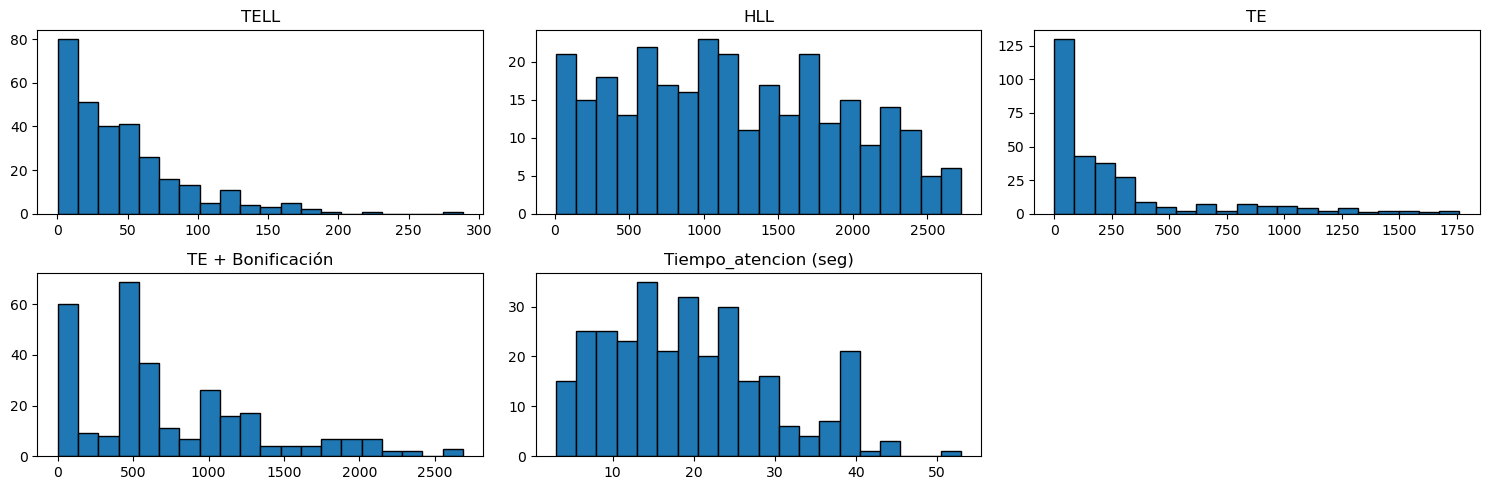

In [6]:
# Analizando la distribución de cada variable numerica.
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.hist(df_num['TELL'], bins=20, edgecolor='black')
plt.title('TELL')

plt.subplot(2, 3, 2)
plt.hist(df_num['HLL'], bins=20, edgecolor='black')
plt.title('HLL')

plt.subplot(2, 3, 3)
plt.hist(df_num['TE'], bins=20, edgecolor='black')
plt.title('TE')

plt.subplot(2, 3, 4)
plt.hist(df_num['TE + Bonificacion'], bins=20, edgecolor='black')
plt.title('TE + Bonificación')

plt.subplot(2, 3, 5)
plt.hist(df_num['Tiempo_atencion (seg)'], bins=20, edgecolor='black')
plt.title('Tiempo_atencion (seg)')

plt.tight_layout()
plt.show()

<h3> Analisis de distribuciones</h3>
<li> Las variables "TELL", "HLL" y "Tiempo_atencion (seg)" presentan distribuciones asimétricas, con mayor concentración de datos en un extremo del rango. Esto sugiere que la media podría no ser la medida de tendencia central más representativa para estas variables. La mediana podría ser una opción más adecuada. </li>
<li> Las variables "TE" y "TE + Bonificación" exhiben distribuciones que se aproximan a una forma normal, con una menor asimetría y dispersión de los datos. </li>
<li> La presencia de valores atípicos es notable en "TELL", "HLL" y "Tiempo_atencion (seg)", lo que podría afectar el análisis estadístico si no se consideran adecuadamente.</li>
<li> La curtosis de todas las variables se encuentra cercana a 3, lo que indica que sus distribuciones se asemejan a una distribución normal. Sin embargo, la asimetría observada en algunas variables sugiere que esta aproximación podría no ser completamente precisa. </li>

<h3> Analisis detallado tiempos de atención (segundos) </h3>

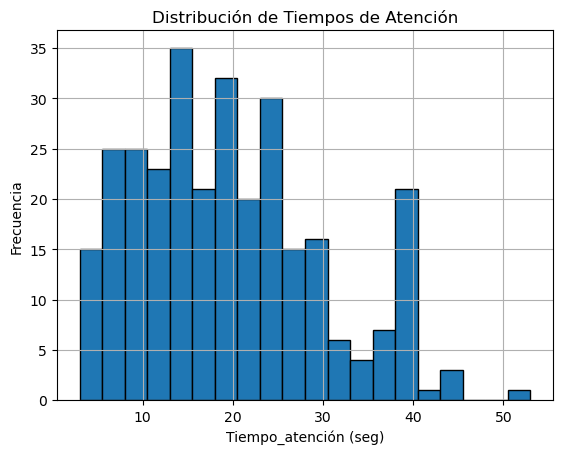

In [7]:
# Importación de bibliotecas
import matplotlib.pyplot as plt

# Creación del histograma
plt.hist(df['Tiempo_atencion (seg)'], bins=20, edgecolor='black')
plt.xlabel('Tiempo_atención (seg)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tiempos de Atención')
plt.grid(True)
plt.show()

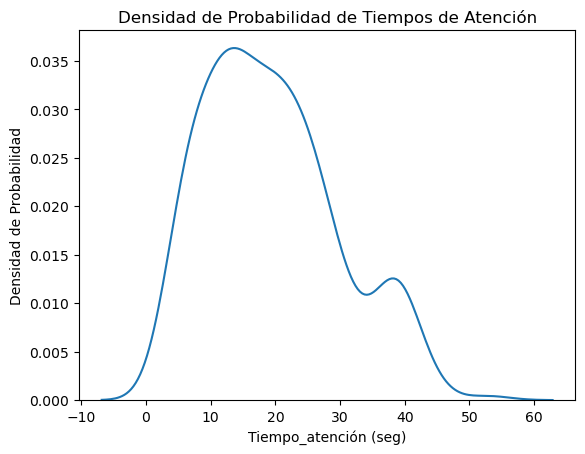

In [8]:
# Importación de bibliotecas
import seaborn as sns

sns.kdeplot(df['Tiempo_atencion (seg)'])
plt.xlabel('Tiempo_atención (seg)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Densidad de Probabilidad de Tiempos de Atención')
plt.show()

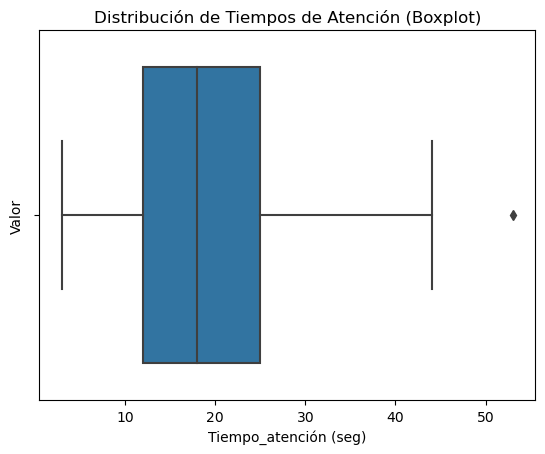

In [9]:
# Importación de bibliotecas
import seaborn as sns

# Boxplot
sns.boxplot(x='Tiempo_atencion (seg)', data=df)
plt.xlabel('Tiempo_atención (seg)')
plt.ylabel('Valor')
plt.title('Distribución de Tiempos de Atención (Boxplot)')
plt.show()

<h3> Analisis de normalidad para la variable Tiempo de atención</h3>
<p> La normalidad es un supuesto clave en muchas pruebas estadísticas. Cuando asumimos que nuestros datos se distribuyen normalmente, podemos utilizar una variedad de técnicas estadísticas poderosas, como la prueba t, el ANOVA y la regresión lineal. Si nuestros datos no son normales, los resultados de estas pruebas pueden ser engañosos y llevar a conclusiones incorrectas.</p>
<p> El test de Shapiro-Wilk ha arrojado un p-valor muy pequeño (5.0570672982530596e-08), lo que indica que podemos rechazar la hipótesis nula de que los datos se distribuyen normalmente. Esto significa que tus datos no siguen una distribución normal.</p>
<h4> ¿Cómo interpretar un QQ-plot? </h4>
<li> Línea recta: Si los puntos se encuentran aproximadamente sobre una línea recta, esto sugiere que nuestros datos siguen la distribución teórica.</li>
<li> Desviaciones de la línea: Si los puntos se desvían significativamente de la línea recta, esto indica que nuestros datos no siguen la distribución teórica. </li>
<li> Forma de la desviación: La forma en que los puntos se desvían de la línea puede proporcionar pistas sobre el tipo de desviación de la normalidad.</li>

Estadístico de Shapiro-Wilk: 0.9546406865119934
p-valor: 5.0570672982530596e-08
La distribución NO es normal


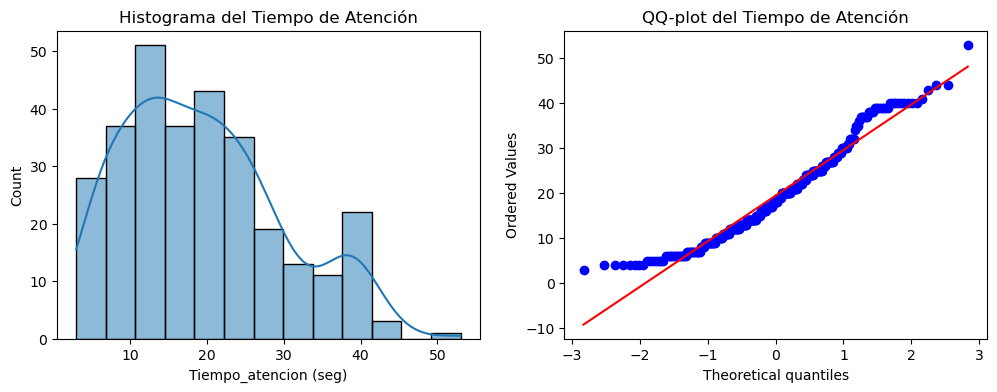

In [22]:
tiempo_atencion = df['Tiempo_atencion (seg)']

# Validación numérica: Test de Shapiro-Wilk
stat, p = stats.shapiro(tiempo_atencion)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-valor:', p)
alpha = 0.05
if p > alpha:
    print('La distribución es probablemente normal')
else:
    print('La distribución NO es normal')

plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(tiempo_atencion, kde=True)
plt.title('Histograma del Tiempo de Atención')

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(tiempo_atencion, plot=plt)
plt.title('QQ-plot del Tiempo de Atención')

plt.show()

<h3> Analisis de normalidad para la variable TELL </h3>

Estadístico de Shapiro-Wilk: 0.9546406865119934
p-valor: 5.0570672982530596e-08
La distribución NO es normal


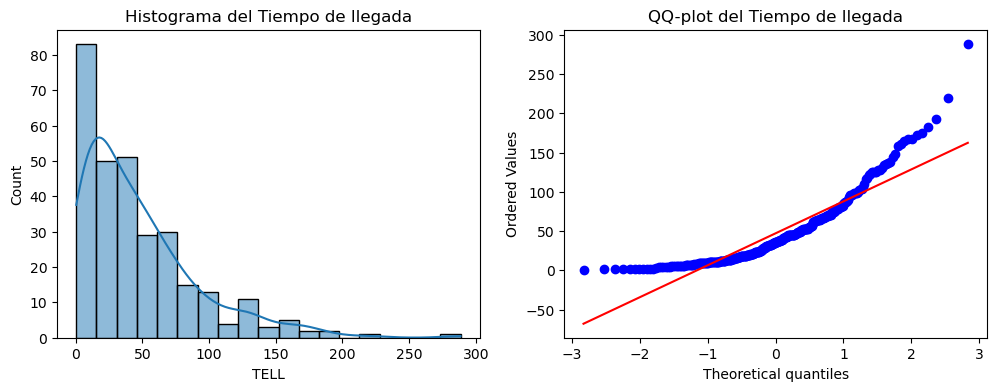

In [23]:
tiempo_llegada = df['TELL']

# Validación numérica: Test de Shapiro-Wilk
stat, p = stats.shapiro(tiempo_atencion)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-valor:', p)
alpha = 0.05
if p > alpha:
    print('La distribución es probablemente normal')
else:
    print('La distribución NO es normal')

plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(tiempo_llegada, kde=True)
plt.title('Histograma del Tiempo de llegada')

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(tiempo_llegada, plot=plt)
plt.title('QQ-plot del Tiempo de llegada')

plt.show()

<h4> 3. Análisis de Distribuciones de Frecuencia para Variables Categóricas: </h4>

In [14]:
df_cat = df[['TIPO', 'BONIFICACION', 'Numero de servidores']]

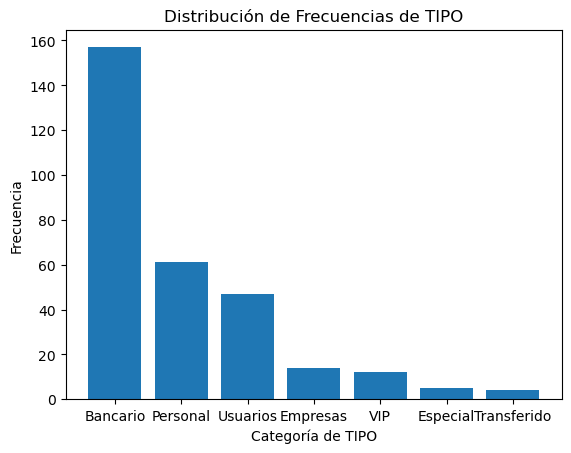

In [15]:
# Gráfico de barras para 'TIPO'
plt.bar(df_cat['TIPO'].value_counts().index, df_cat['TIPO'].value_counts().values)
plt.xlabel('Categoría de TIPO')
plt.ylabel('Frecuencia')
plt.title('Distribución de Frecuencias de TIPO')
plt.show()

In [16]:
# Valores únicos
print(df_cat['BONIFICACION'].unique())

[ 400 1800    0 1000]


In [17]:
# Frecuencias y porcentajes
print(df_cat['BONIFICACION'].value_counts(normalize=True).reset_index(name='Porcentaje'))

   index  Porcentaje
0    400        0.57
1   1000        0.22
2      0        0.17
3   1800        0.04


<h4> 4. Relaciones entre Variables Numéricas: </h4>

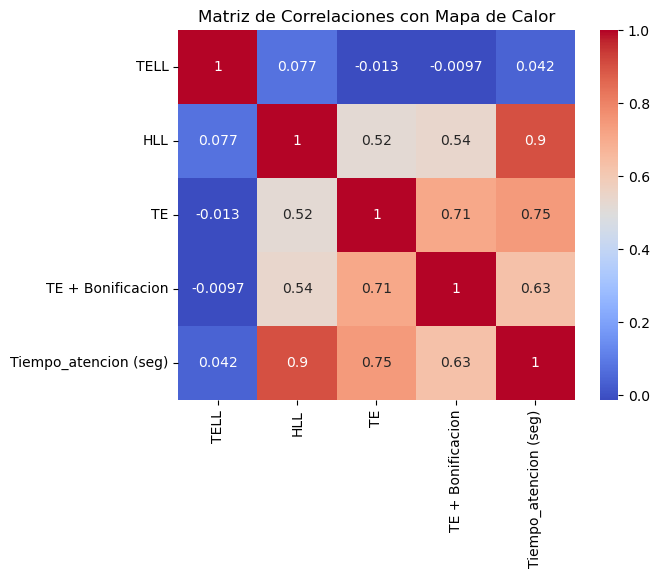

In [18]:
# Matriz de correlación con mapa de calor
sns.heatmap(df_num.corr(), annot=True, fmt='.2g', cmap='coolwarm')
plt.title('Matriz de Correlaciones con Mapa de Calor')
plt.show()

<h4> 5. Detección de Anomalías y Valores Atípicos, para variables numericas </h4>

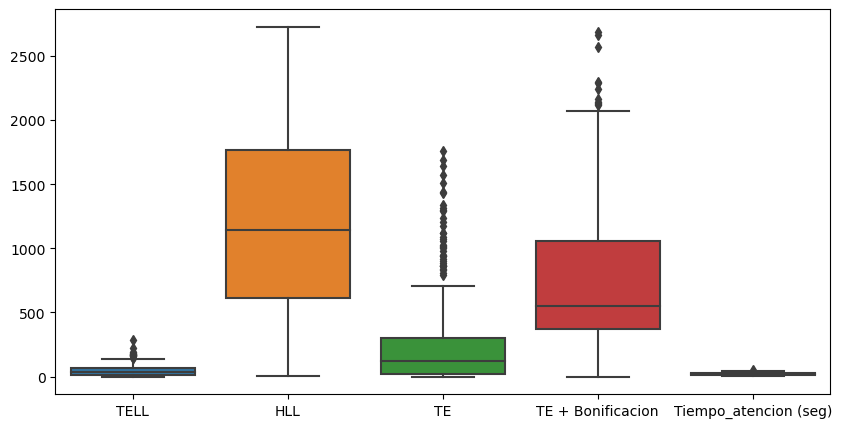

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_num)
plt.show()

<h3> Interpretación del Gráfico Cajas y Bigotes</h3>
<p> Caja: </p>
<li> Borde inferior de la caja: Corresponde al primer cuartil (Q1), es decir, el 25% de los datos están por debajo de este valor. </li>
<li> Línea central de la caja: Corresponde a la mediana, que divide los datos en dos partes iguales.</li>
<li> Borde superior de la caja: Corresponde al tercer cuartil (Q3), el 75% de los datos están por debajo de este valor.</li>
<li> Altura de la caja: Representa el rango intercuartílico (IQR), que es una medida de dispersión de los datos.</li>
<p> Bigotes: </p>
<li> Bigote inferior: Se extiende hasta el valor más pequeño que no sea un outlier. </li>
<li> Bigote superior: Se extiende hasta el valor más grande que no sea un outlier.</li>
<li> Outliers: Los puntos individuales por encima o por debajo de los bigotes son considerados outliers, es decir, valores atípicos que se encuentran muy alejados del resto de los datos.</li>
<h3> Conclusiones a partir del Gráfico: </h3>
<li> Variabilidad en los tiempos de atención: El tamaño de las cajas y la longitud de los bigotes nos indican que existe una gran variabilidad en los tiempos de atención entre los diferentes tipos de clientes o en las diferentes etapas del proceso.</li>
<li> Presencia de outliers: La cantidad y ubicación de los outliers sugieren que hay algunos clientes que tienen tiempos de atención significativamente más largos o más cortos que el resto. </li>
<li> Comparación entre grupos: Al comparar las cajas de las diferentes variables, podemos identificar diferencias en los tiempos de atención promedio y en la dispersión de los datos. Por ejemplo, el grupo "HLL" parece tener los tiempos de atención más altos en promedio.</li>